# **Bank Customer Churn Prediction**

# Introduction :

Dans cette étude, nous visons à réaliser :

   - Identifiez et visualisez les facteurs qui contribuent au désabonnement des clients.

   - Tester plusieurs modèles de prédiction qui effectueront une classification si un client va quitter la banque ou non.

Cela permettra au service client de cibler plus facilement les efforts à effectuer pour éviter le taux de désabonnement.

In [1]:
from IPython.display import Image
Image(filename='Churn.png',width = 800, height = 300)

In [2]:
#Import usual librairies
import numpy as np                # providing linear algebra
import pandas as pd               # to manipulate data frames
import matplotlib.pyplot as plt   # to create nice visualizations
import seaborn as sns             # basic tools for visualizations

# Import scikit-learn for machine learning 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,confusion_matrix,precision_score


import warnings
warnings.filterwarnings("ignore")

# Partie 1 - Importation et découverte du jeu de données : <a name="P1"></a>

Dans cette section, nous chercherons à explorer la structure de nos données.

In [56]:
#Import "Churn_Modelling.csv" dataset sur Pandas
dataset = pd.read_csv("Churn_Modelling.csv",index_col='RowNumber')

print("Database has {} observations (Bank customers) and {} columns (attributes).".format(dataset.shape[0],dataset.shape[1]))
print('-'*75)
dataset.head(10)

Database has 10000 observations (Bank customers) and 13 columns (attributes).
---------------------------------------------------------------------------


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# Vérifions s'il y a des valeurs manquantes dans chaque colonne
dataset.isnull().any()

CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

#### Pas de valeurs manquantes dans le dataset !

In [6]:
# Visualisations des statistiques importantes des variables.
dataset.describe(include='all') # Include = 'all' permet d'afficher les variables qualitatives

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# Partie 2 - Nettoyage du jeu de données :<a name="P2"></a>

Dans cette section, nous chercherons à nettoyer le jeu de données des colonnes inutiles à notre étude.

- Tout d'abord, pas de valeurs manquantes dans le dataset.
- Pour les colonnes, ni le "Customer ID", ni le "Surname" ne doivent avoir d'importance dans la classification, car il sont spécifiques à un chaque client.

In [7]:
# Supprimer la colonne "customer ID" et "surname"  car cela ne sert à rien
dataset.drop(columns = ['CustomerId','Surname'],inplace=True)
dataset.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
3067,503,France,Female,28,5,0.00,2,1,0,125918.17,0
6940,570,France,Female,43,9,0.00,2,0,1,11417.26,0
9047,630,Germany,Female,23,4,137964.51,1,0,1,174570.55,0
4337,580,Germany,Male,38,9,115442.19,2,1,0,128481.50,1
3047,658,Germany,Female,31,3,133003.03,1,0,1,146339.27,1


In [8]:
n_unique = dataset.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


In [9]:
# Certaines variables semblent être discrètes à valeurs finies
print(dataset['Geography'].unique())
print("-"*75)
print(dataset['Gender'].unique())
print("-"*75)
print(dataset['NumOfProducts'].unique())
print("-"*75)

['France' 'Spain' 'Germany']
---------------------------------------------------------------------------
['Female' 'Male']
---------------------------------------------------------------------------
[1 3 2 4]
---------------------------------------------------------------------------


# Partie 3 - Visualisations et analyses du jeu de données :<a name="P3"></a>

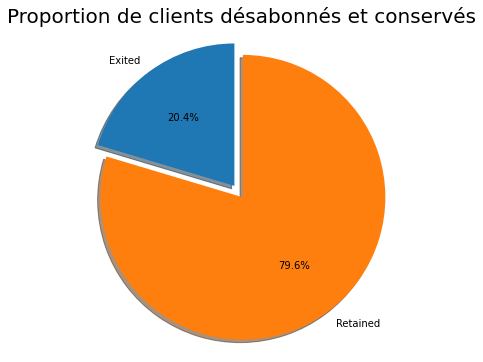

In [10]:
labels = 'Exited', 'Retained'
sizes = [dataset.Exited[dataset['Exited']==1].count(), dataset.Exited[dataset['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion de clients désabonnés et conservés", size = 20)
plt.show()
#Sur les 10 000 observations, ~2000 clients ont quitté la banque.

   - Environ 20% des clients se sont désabonnés de cette banque d'après le jeu de données.

Male      5457
Female    4543
Name: Gender, dtype: int64


Text(0, 0.5, 'Nombre de clients ')

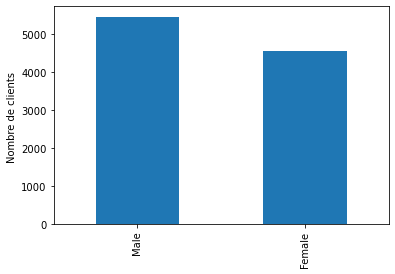

In [11]:
# Visualisations des données par genre 
print(dataset['Gender'].value_counts())
dataset['Gender'].value_counts().plot(kind='bar').set_ylabel("Nombre de clients ")

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Text(0, 0.5, 'Nombre de clients ')

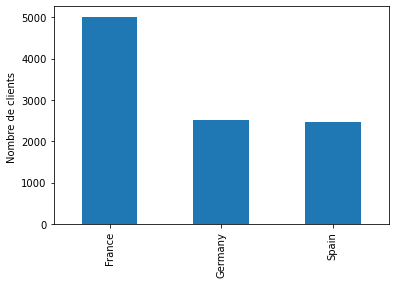

In [12]:
# Visualisations des données par pays
print(dataset['Geography'].value_counts())
dataset['Geography'].value_counts().plot.bar().set_ylabel("Nombre de clients ")

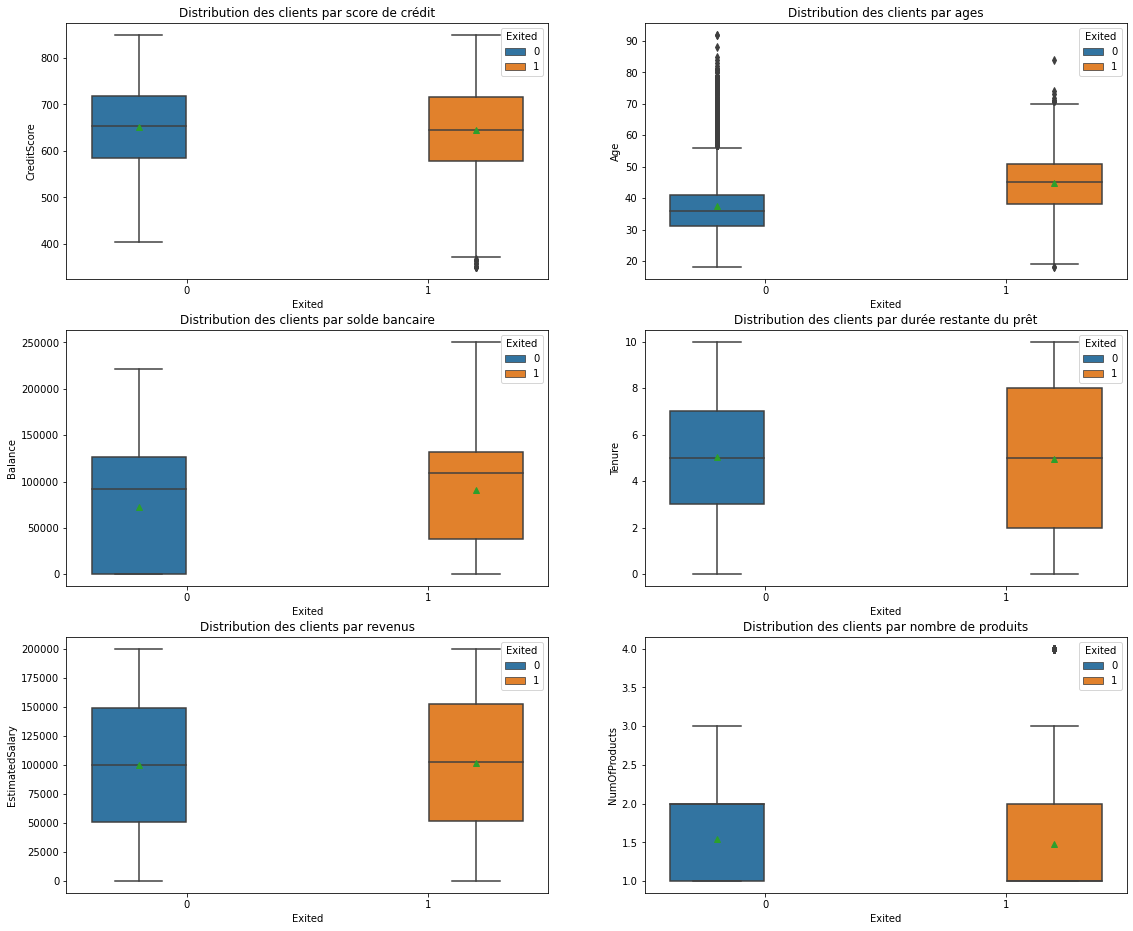

In [13]:
# Recherche d'outliers (valeurs supectes)
plt.figure(figsize=(19, 16))
plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore",hue = 'Exited', data=dataset, showmeans=True)
plt.title("Distribution des clients par score de crédit")
plt.subplot(3,2,2)
sns.boxplot(x = 'Exited', y='Age',hue = 'Exited',data = dataset , showmeans=True)
plt.title("Distribution des clients par ages")
plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance",hue = 'Exited', data=dataset, showmeans=True)
plt.title("Distribution des clients par solde bancaire")
plt.subplot(3,2,4)
sns.boxplot(x = 'Exited', y='Tenure',hue = 'Exited',data = dataset, showmeans=True)
plt.title("Distribution des clients par durée restante du prêt")
plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="EstimatedSalary",hue = 'Exited', data=dataset, showmeans=True)
plt.title("Distribution des clients par revenus")
plt.subplot(3,2,6)
sns.boxplot(x = 'Exited', y='NumOfProducts',hue = 'Exited',data = dataset, showmeans=True)
plt.title("Distribution des clients par nombre de produits")
plt.show()

On remarque : 
    
   - Il n'y a pas de différence significative dans la distribution du score de crédit entre les clients retenus et les clients désabonnés.
    
   - Les clients plus âgés sont plus nombreux que les plus jeunes, ce qui fait allusion à une différence de préférence de service dans les catégories d'âge.
   
   - En ce qui concerne la durée restante des prêts, les clients des deux extrémités sont plus susceptibles de se déstabiliser que ceux qui ont une ancienneté moyenne.
   
   - La banque perd des clients dont les soldes bancaires sont importants, ce qui risque de toucher leur capital disponible pour les prêts.
   
   - Ni le nombre de produits affiliés ni le salaire n'ont un effet significatif sur la probabilité de désabonnement du client.

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

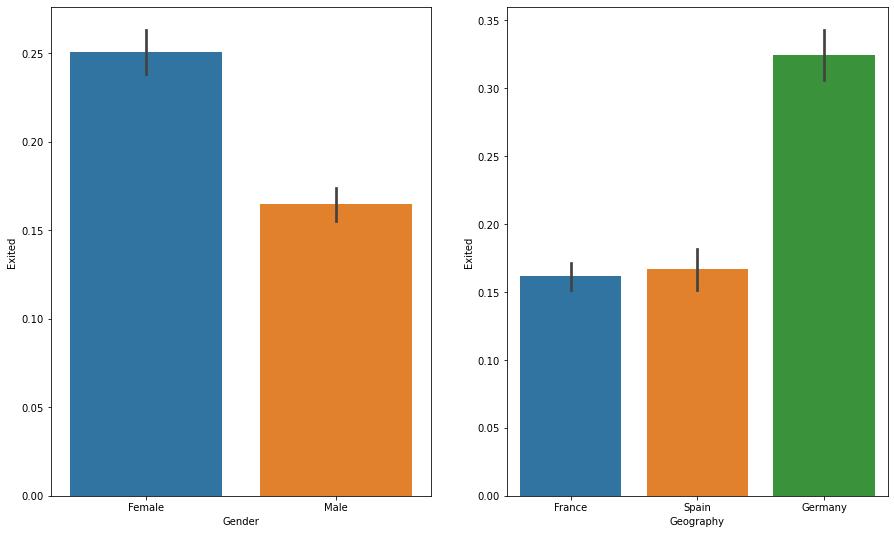

In [14]:
# Visualisations exploratoires 
fig, axs = plt.subplots(1,2, figsize=(15, 9))
sns.barplot(x="Gender", y="Exited", data = dataset,ax=axs[0])
sns.barplot(x="Geography", y="Exited", data = dataset,ax=axs[1])

<AxesSubplot:xlabel='Age', ylabel='Exited'>

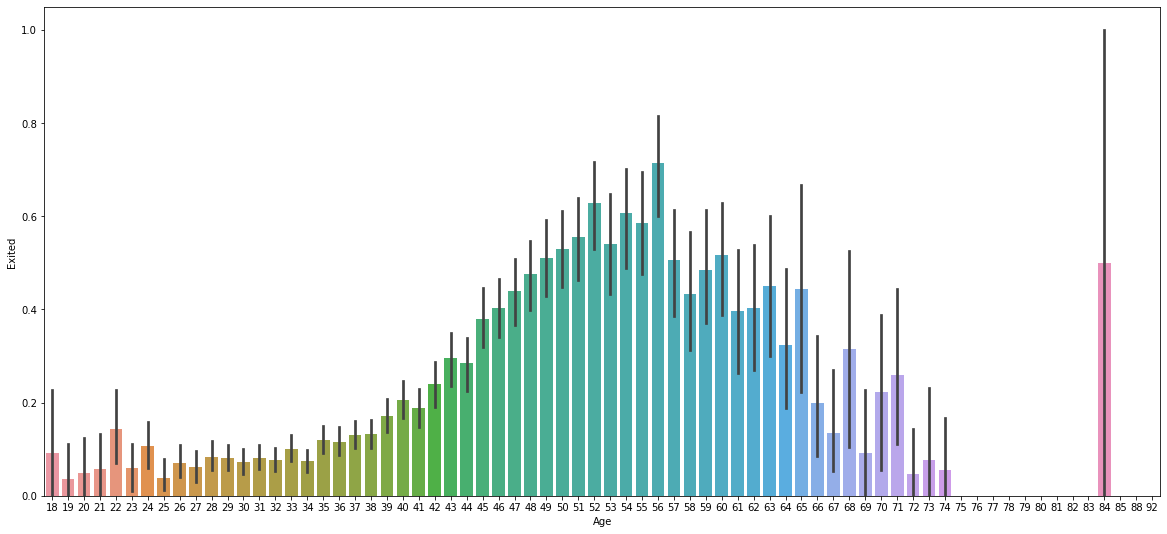

In [15]:
plt.figure(figsize=(20,9))
sns.barplot(x="Age", y="Exited", data = dataset)

[Text(0, 0.5, 'Nombre de clients')]

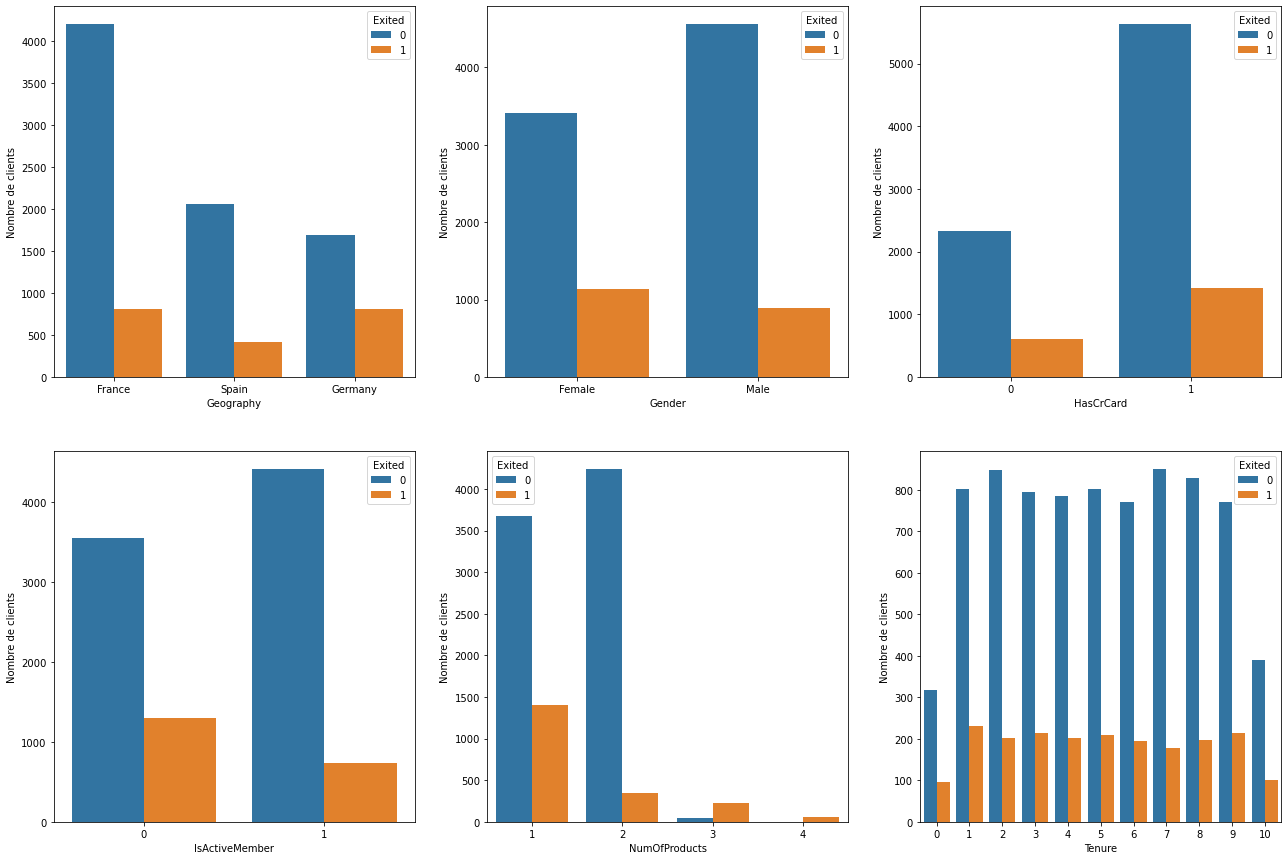

In [16]:
# Visualisation de la prévision du taux de désabonnement des clients :
plt.figure(figsize=(22, 15))

#en fonction du pays
plt.subplot(2,3,1)
sns.countplot(x='Geography', hue = 'Exited',data = dataset).set(ylabel ="Nombre de clients")

#en fonction du genre
plt.subplot(2,3,2)
sns.countplot(x='Gender', hue = 'Exited',data = dataset).set(ylabel ="Nombre de clients")

#en fonction des clients possédant une carte de crédit
plt.subplot(2,3,3)
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset).set(ylabel ="Nombre de clients")

#en fonction des clients actifs
plt.subplot(2,3,4)
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset).set(ylabel ="Nombre de clients")

#en fonction des nombres de produits affiliés à un compte bancaire que la personne possède
plt.subplot(2,3,5)
sns.countplot(x='NumOfProducts', hue = 'Exited',data = dataset).set(ylabel ="Nombre de clients")

#en fonction de la durée restante du prêt d'un client 
plt.subplot(2,3,6)
sns.countplot(x='Tenure', hue = 'Exited',data = dataset).set(ylabel ="Nombre de clients")

On remarque : 

   - La majorité des données proviennent de clients français.
   
   - Parmi les clients désabonnés, ceux qui sont géographiquement situés en Allemagne ont un taux de désabonnement élevé avec 40%.
    
   - La proportion de clientèles féminines désabonnées est supérieure à celle des clients masculins, les femmes ont 55,9% tandis que les hommes avec 44,1%. 
   
   - La majorité des clients qui se sont désabonnés, ont des cartes de crédit. 
   
   - Les clients affiliés à un seul produit risquent de se désabonner. 
   
   - Sans surprise, les membres inactifs ont un taux de désabonnement important. Il est inquiétant de constater que la proportion globale de membres inactifs est assez élevée.

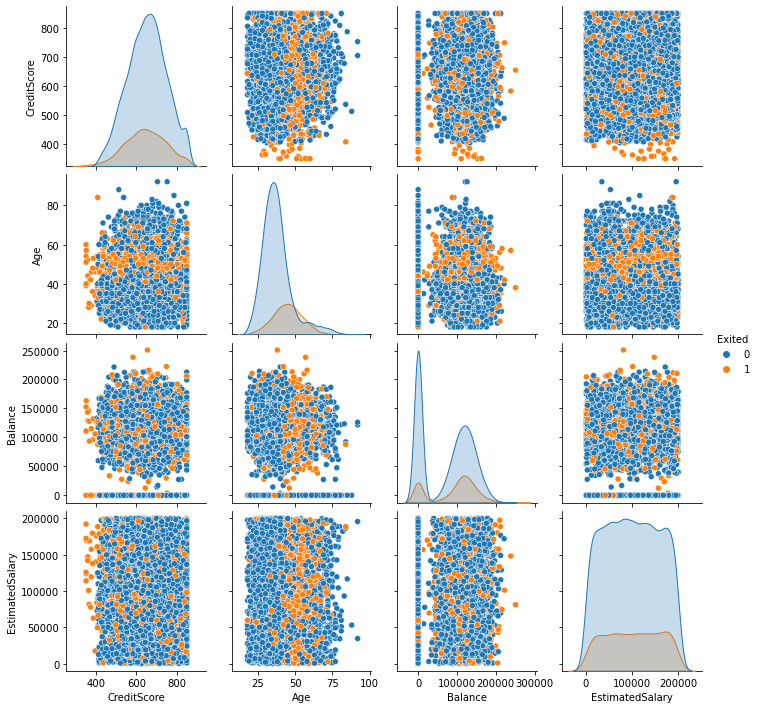

In [17]:
sns.pairplot(dataset[['CreditScore','Age','Balance','EstimatedSalary','Exited']], hue='Exited')

-  Environ 81% des clients qui ont un score de crédit le plus élevé n'ont pas quitté la banque.

**Étant donné que la plupart des données se chevauchent, il est préférable de choisir un classificateur (Decision Tree, Random Forest, KNN, etc.)**

# Partie 4 : Préparation des données : <a name='P4'></a>

Dans cette section, nous chercherons à préparer le jeu de données pour les tâches de prédiction.

## 4.1 - Gérer les variables catégorielles :

In [18]:
# Dummyfication 
dataset = pd.get_dummies(dataset, columns=['Geography','Gender'], drop_first=True)
dataset.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## 4.2 - Déterminer les variables expliquée et explicatives :

In [19]:
# Création de la variable à expliquer (=> target)
y = dataset[["Exited"]]

# Création des variables explicatives (=> predicteurs)
X = dataset[[ 'CreditScore','Age', 'Balance','Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male' ]]

In [20]:
X.head(3)

,CreditScore,Age,Balance,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
1,619,42,0.00,2,1,1,1,101348.88,0,0,0
2,608,41,83807.86,1,1,0,1,112542.58,0,1,0
3,502,42,159660.80,8,3,1,0,113931.57,0,0,0


In [21]:
y.head(3)

,Exited
RowNumber,
1,1
2,0
3,1


## 4.3 - Centrer et réduire des données :

* Les variables non pas la même échelle, nous effectuons un centrage réduction des données.

 Normalization of $X$ :

In [22]:
sc_X = StandardScaler()

X_cr = sc_X.fit_transform(X[['CreditScore', 'Age', 'Balance','EstimatedSalary', 'Tenure']])
print(X_cr)
print("-"*50)
# Attention, après le centrage et réduction, l'objet devient une matrice.
print("La taille de la matrice est {}.".format(X_cr.shape))
print("-"*50)
# Vérifions que la moyenne est 0 et que l'écart-type est 1.
print("La moyenne des variables est {}.".format(X_cr.mean(axis=0)))
print("L'écart-type des variables est {}.".format(X_cr.std(axis=0)))

[[-0.32622142  0.29351742 -1.22584767  0.02188649 -1.04175968]
 [-0.44003595  0.19816383  0.11735002  0.21653375 -1.38753759]
 [-1.53679418  0.29351742  1.33305335  0.2406869   1.03290776]
 ...
 [ 0.60498839 -0.27860412 -1.22584767 -1.00864308  0.68712986]
 [ 1.25683526  0.29351742 -0.02260751 -0.12523071 -0.69598177]
 [ 1.46377078 -1.04143285  0.85996499 -1.07636976 -0.35020386]]
--------------------------------------------------
La taille de la matrice est (10000, 5).
--------------------------------------------------
La moyenne des variables est [-4.82458518e-16  2.31814568e-16 -6.25277607e-17 -2.87769808e-17
 -1.07824860e-16].
L'écart-type des variables est [1. 1. 1. 1. 1.].


In [23]:
# Transformons la matrice en dataframe.
X_cr = pd.DataFrame(X_cr, columns = ['CreditScore_cr', 'Age_cr', 'Balance_cr','EstimatedSalary_cr','Tenure_cr'])
X_cr.index = X_cr.index + 1
print(X_cr)

# Concatenons les 2 colonnes avec les valeurs normalisées avec notre dataset.
dataset_final = pd.concat([X_cr,X], axis=1)
dataset_final.head(5)

       CreditScore_cr    Age_cr  Balance_cr  EstimatedSalary_cr  Tenure_cr
1           -0.326221  0.293517   -1.225848            0.021886  -1.041760
2           -0.440036  0.198164    0.117350            0.216534  -1.387538
3           -1.536794  0.293517    1.333053            0.240687   1.032908
4            0.501521  0.007457   -1.225848           -0.108918  -1.387538
5            2.063884  0.388871    0.785728           -0.365276  -1.041760
...               ...       ...         ...                 ...        ...
9996         1.246488  0.007457   -1.225848           -0.066419  -0.004426
9997        -1.391939 -0.373958   -0.306379            0.027988   1.724464
9998         0.604988 -0.278604   -1.225848           -1.008643   0.687130
9999         1.256835  0.293517   -0.022608           -0.125231  -0.695982
10000        1.463771 -1.041433    0.859965           -1.076370  -0.350204

[10000 rows x 5 columns]


,CreditScore_cr,Age_cr,Balance_cr,EstimatedSalary_cr,Tenure_cr,CreditScore,Age,Balance,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1,-0.326221,0.293517,-1.225848,0.021886,-1.041760,619,42,0.00,2,1,1,1,101348.88,0,0,0
2,-0.440036,0.198164,0.117350,0.216534,-1.387538,608,41,83807.86,1,1,0,1,112542.58,0,1,0
3,-1.536794,0.293517,1.333053,0.240687,1.032908,502,42,159660.80,8,3,1,0,113931.57,0,0,0
4,0.501521,0.007457,-1.225848,-0.108918,-1.387538,699,39,0.00,1,2,0,0,93826.63,0,0,0
5,2.063884,0.388871,0.785728,-0.365276,-1.041760,850,43,125510.82,2,1,1,1,79084.10,0,1,0


In [24]:
dataset_final.drop(['CreditScore', 'Age','Balance' ,'EstimatedSalary','Tenure'], axis =1, inplace=True)
dataset_final.head(10)

,CreditScore_cr,Age_cr,Balance_cr,EstimatedSalary_cr,Tenure_cr,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
1,-0.326221,0.293517,-1.225848,0.021886,-1.041760,1,1,1,0,0,0
2,-0.440036,0.198164,0.117350,0.216534,-1.387538,1,0,1,0,1,0
3,-1.536794,0.293517,1.333053,0.240687,1.032908,3,1,0,0,0,0
4,0.501521,0.007457,-1.225848,-0.108918,-1.387538,2,0,0,0,0,0
5,2.063884,0.388871,0.785728,-0.365276,-1.041760,1,1,1,0,1,0
6,-0.057205,0.484225,0.597329,0.863650,1.032908,2,1,0,0,1,1
7,1.774174,1.056346,-1.225848,-1.565487,0.687130,2,1,1,0,0,1
8,-2.840488,-0.946079,0.618019,0.334854,-0.350204,4,1,0,1,0,0
9,-1.547141,0.484225,1.050820,-0.437329,-0.350204,2,0,1,0,0,1
10,0.346319,-1.136786,0.931463,-0.493230,-1.041760,1,1,1,0,0,1


## 4.4 - Séparation du jeu de données (train/test) : 

In [25]:
# Créons les 4 jeu de données.
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(dataset_final, y, test_size = 0.2, random_state = 13)
print("...Done.")

Dividing into train and test sets...
...Done.


In [26]:
print("Nb de ligne de X_train = {}".format(len(X_train)))
print("Nb de ligne de X_test = {}".format(len(X_test)))
print("Nb de ligne de y_train = {}".format(len(y_train)))
print("Nb de ligne de y_test = {}".format(len(y_test)))

Nb de ligne de X_train = 8000
Nb de ligne de X_test = 2000
Nb de ligne de y_train = 8000
Nb de ligne de y_test = 2000


Nous avons donc un jeu de données d'entrainement :
- y_train avec la variable à expliquer (=> Exited : Turnover des clients )
- X_train avec les variables explicatives.   

Et un jeu de données de test qui nous permettra de vérifier la performance du modèle:
- y_test avec la variable à expliquer.
- X_test avec les variables explicatives.

In [27]:
print("La dimension du jeu d'entrainement :")
print(X_train.shape)
print('-'*75)
X_train

La dimension du jeu d'entrainement :
(8000, 11)
---------------------------------------------------------------------------


,CreditScore_cr,Age_cr,Balance_cr,EstimatedSalary_cr,Tenure_cr,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
3400,-0.233100,-0.755372,1.586008,0.227395,0.341352,1,1,0,0,0,0
4493,-0.626278,-0.660018,0.821828,0.010908,-1.733315,1,1,0,0,0,0
8725,0.180771,-0.850726,-1.225848,0.667311,1.032908,2,1,0,0,1,0
886,-1.340205,-1.327494,-1.225848,1.004883,0.687130,2,1,1,0,0,1
5854,-0.564197,0.102810,-0.225932,0.843944,-0.004426,3,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5877,0.553255,0.007457,0.561576,1.728375,-1.041760,1,1,0,0,0,1
867,-1.091883,-0.087897,0.189236,-1.317865,-1.387538,2,1,1,0,0,1
7697,-0.377955,0.007457,0.793523,0.486181,1.032908,1,1,1,1,0,0
75,-1.360899,-0.278604,-1.225848,0.790715,1.378686,2,0,1,0,0,1


# Partie 5 - Modélisation :  <a name='P5'></a>

Nous allons essayer quelques algorithmes de Machine Learning afin d'avoir une idée de celui qui fonctionne le mieux. 

Comme notre problème est un problème de classification, les algorithmes que nous allons choisir sont les suivants:

   - Logistic Regression (LR)
   - Decision Tree (DT)
   - Random Forest (RF)


##  5.1 - Modélisation avec avec une régression logistique :

### a) - Modélisation avec le jeu d'entrainement

In [28]:
print("Train model...")
from sklearn.linear_model import LogisticRegression

classifier_LR = LogisticRegression()

Train model...


In [29]:
# Méthode des moindres carrées.
classifier_LR.fit(X_train, y_train)

LogisticRegression()

In [30]:
coefs = classifier_LR.coef_
print("Les coefficient associés aux variables est de {}".format(coefs))

# Comme les variables sont centrées-réduites, on peut comparer les coefficients entre eux.
coefs =  pd.DataFrame({"Features": ['CreditScore_cr', 'Age_cr', 'Balance_cr', 'EstimatedSalary_cr','Tenure_cr',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography_Germany','Geography_Spain', 'Gender_Male'],
              "Values": coefs[0]})

coefs.sort_values(["Values"], ascending=False)

Les coefficient associés aux variables est de [[-0.05263531  0.7839698   0.16936129  0.05209062 -0.04292839 -0.04292795
  -0.09462845 -1.08074054  0.78496787  0.00186407 -0.48712993]]


,Features,Values
8,Geography_Germany,0.784968
1,Age_cr,0.783970
2,Balance_cr,0.169361
3,EstimatedSalary_cr,0.052091
9,Geography_Spain,0.001864
5,NumOfProducts,-0.042928
4,Tenure_cr,-0.042928
0,CreditScore_cr,-0.052635
6,HasCrCard,-0.094628
10,Gender_Male,-0.487130


### b) - Evaluation du modèle

In [31]:
# Evaluation du modèle 
print("Train score : {}".format(classifier_LR.score(X_train, y_train)))
print("Test score : {}".format(classifier_LR.score(X_test, y_test)))

Train score : 0.809375
Test score : 0.8135


In [32]:
#Prendre l'exponentielle des coefficients.
pd.DataFrame(np.concatenate([classifier_LR.intercept_.reshape(-1,1),np.exp(classifier_LR.coef_)],axis=1), index = ["coefs"],columns = ["constante"]+list(X_test.columns)).T

,coefs
constante,-0.913628
CreditScore_cr,0.948726
Age_cr,2.190149
Balance_cr,1.184548
EstimatedSalary_cr,1.053471
Tenure_cr,0.957980
NumOfProducts,0.957980
HasCrCard,0.909711
IsActiveMember,0.339344
Geography_Germany,2.192337


### c) - Effectuer une prédiction

In [33]:
# Calculons les probabilités pour chaque individu du training test
y_test_pred_prob = classifier_LR.predict_proba(X_test)
y_test_pred_prob[:10]

array([[0.97469711, 0.02530289],
       [0.9091522 , 0.0908478 ],
       [0.90403952, 0.09596048],
       [0.9651603 , 0.0348397 ],
       [0.93110435, 0.06889565],
       [0.84105988, 0.15894012],
       [0.57065745, 0.42934255],
       [0.46488758, 0.53511242],
       [0.84740176, 0.15259824],
       [0.94219919, 0.05780081]])

In [34]:
# Calculons les probabilités pour chaque individu du training test
print("Predictions on training set...")
y_test_pred_LR = classifier_LR.predict(X_test)
print("...Done.")
y_test_pred_LR

Predictions on training set...
...Done.


array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:ylabel='Density'>

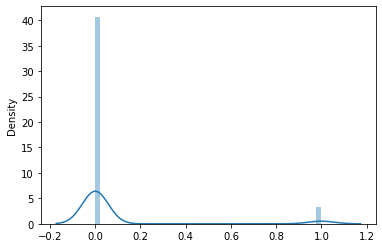

In [35]:
sns.distplot(y_test_pred_LR)

### d) - Matrice de confusion 

In [36]:
# Confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_test_pred_LR)
cm

array([[1536,   59],
       [ 314,   91]])

<AxesSubplot:>

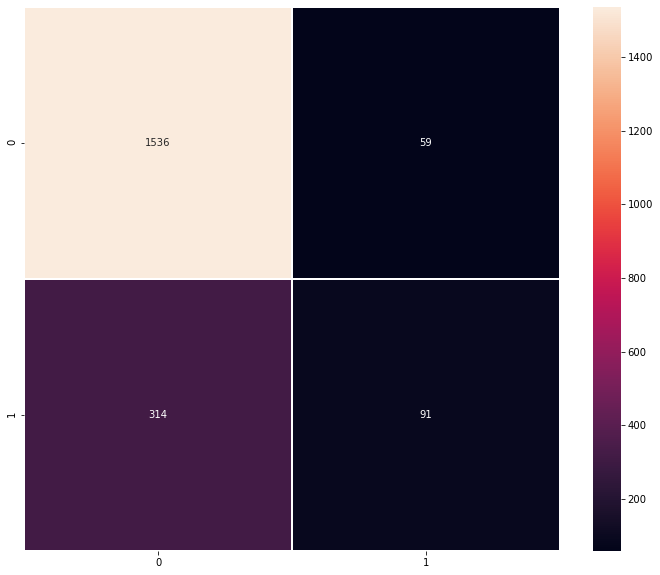

In [37]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt = "d",linewidths=.5, ax=ax)

### e) - Calcul des métrics pour évaluer le modèle : "Accuracy", "Recall", et "Precision" :

**Accuracy :**

   - The accuracy is one metric for evaluating classification models. 
   - It is the fraction of predictions our model got right, and has the following definition: Number of correct predictions / Total number of predictions 
   - For binary classification, accuracy can also be calculated in terms of positives and negatives as follows : (tp + tn) / (tp + tn + fp + fn)
   

In [38]:
#LogisticRegression
Accuracy_LR =  "%1.4f" % accuracy_score(y_test, y_test_pred_LR)
print("Accuracy_LR :", Accuracy_LR)
#Autre méthode :
Accuracy_LR =  (1544+79) / len(y_test)
print("Accuracy_LR : %1.4f" % Accuracy_LR)

Accuracy_LR : 0.8135
Accuracy_LR : 0.8115


**Recall :**

   - The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
   - The best value is 1 and the worst value is 0.

In [39]:
Recall_LR = "%1.4f" % recall_score(y_test, y_test_pred_LR)
print("Recall_LR :",Recall_LR)
# Autre méthode : 
Recall_LR = 79/ (79+314)
print("Recall_LR : %1.4f" % Recall_LR)

Recall_LR : 0.2247
Recall_LR : 0.2010


**Precision :**

   - The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
   - The best value is 1 and the worst value is 0

In [40]:
Precision_LR = "%1.4f" % precision_score(y_test.astype(int), y_test_pred_LR.astype(int))
print("Precision_LR :",Precision_LR)
# Autre méthode : 
Precision_LR = 79/ (79+63)
print("Precision_LR : %1.4f" % Precision_LR)

Precision_LR : 0.6067
Precision_LR : 0.5563


##  5.2 - Modélisation avec un arbre de décision :

### a) - Modélisation avec le jeu d'entrainement

In [41]:
from sklearn.tree import DecisionTreeClassifier

classifier2_DT = DecisionTreeClassifier()
classifier2_DT.fit(X_train, y_train)

DecisionTreeClassifier()

### b) - Evaluation du modèle

In [42]:
# Evaluation du modèle 
print("Train score: {}".format(classifier2_DT.score(X_train, y_train)))
print("Test score: {}".format(classifier2_DT.score(X_test, y_test)))

Train score: 1.0
Test score: 0.795


### c) - Effectuer une prédiction

In [43]:
y_test_pred_prob = classifier2_DT.predict_proba(X_test)
y_test_pred_prob[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [44]:
print("Predictions on training set...")
y_test_pred_DT = classifier2_DT.predict(X_test)
print("...Done.")
y_test_pred_DT

Predictions on training set...
...Done.


array([0, 0, 0, ..., 1, 0, 1])

<AxesSubplot:ylabel='Density'>

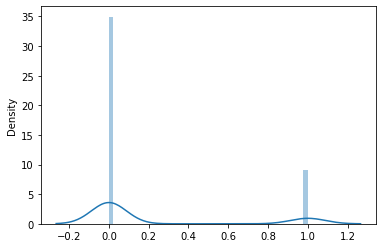

In [45]:
sns.distplot(y_test_pred_DT)

### d) - Matrice de confusion

<AxesSubplot:>

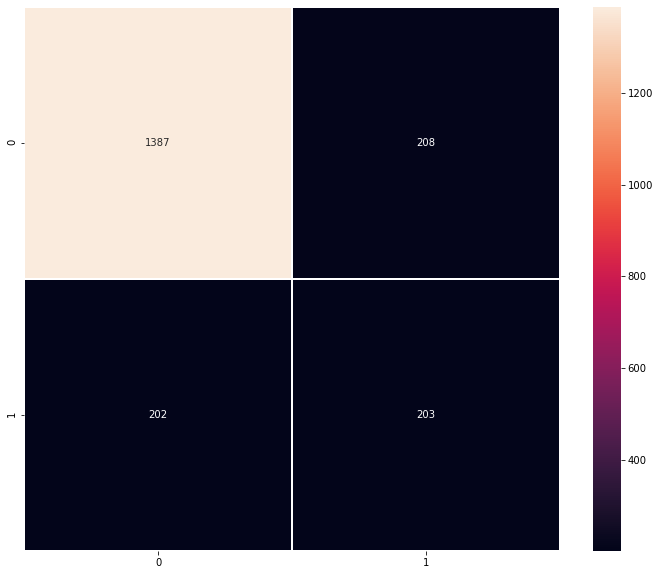

In [46]:
cm = confusion_matrix(y_test, y_test_pred_DT)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt = "d",linewidths=.5, ax=ax)

### e) - Calcul des scores "Accuracy", "Recall", et "Precision" :

In [47]:
#DecisionTree
Accuracy_DT =  "%1.4f" % accuracy_score(y_test, y_test_pred_DT)
Recall_DT = "%1.4f" % recall_score(y_test, y_test_pred_DT)
Precision_DT = "%1.4f" % precision_score(y_test.astype(int), y_test_pred_DT.astype(int))

print("Accuracy_DT :", Accuracy_DT)
print("Recall_DT : ", Recall_DT)
print("Precision_DT :",Precision_DT)

Accuracy_DT : 0.7950
Recall_DT :  0.5012
Precision_DT : 0.4939


##  5.3 - Modélisation avec un Random Forest :

### a) - Modélisation avec le jeu d'entrainement

In [48]:
from sklearn.ensemble import RandomForestClassifier

classifier3_RF = RandomForestClassifier()
classifier3_RF.fit(X_train, y_train)

RandomForestClassifier()

### b) - Evaluation du Modèle

In [49]:
print("Train score: {}".format(classifier3_RF.score(X_train, y_train)))
print("Test score: {}".format(classifier3_RF.score(X_test, y_test)))

Train score: 1.0
Test score: 0.8645


### c) - Effectuer une prédiction

In [50]:
y_test_pred_prob = classifier3_RF.predict_proba(X_test)
y_test_pred_prob[:10]

array([[0.92, 0.08],
       [0.91, 0.09],
       [0.99, 0.01],
       [0.92, 0.08],
       [0.86, 0.14],
       [0.85, 0.15],
       [0.71, 0.29],
       [0.41, 0.59],
       [0.98, 0.02],
       [1.  , 0.  ]])

In [51]:
print("Predictions on training set...")
y_test_pred_RF = classifier3_RF.predict(X_test)
print("...Done.")
y_test_pred_RF

Predictions on training set...
...Done.


array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:ylabel='Density'>

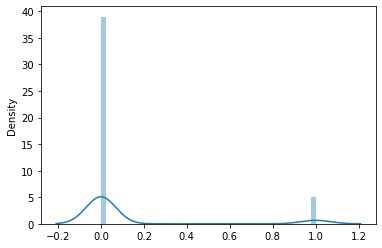

In [52]:
sns.distplot(y_test_pred_RF)

### d) - Matrice de confusion

<AxesSubplot:>

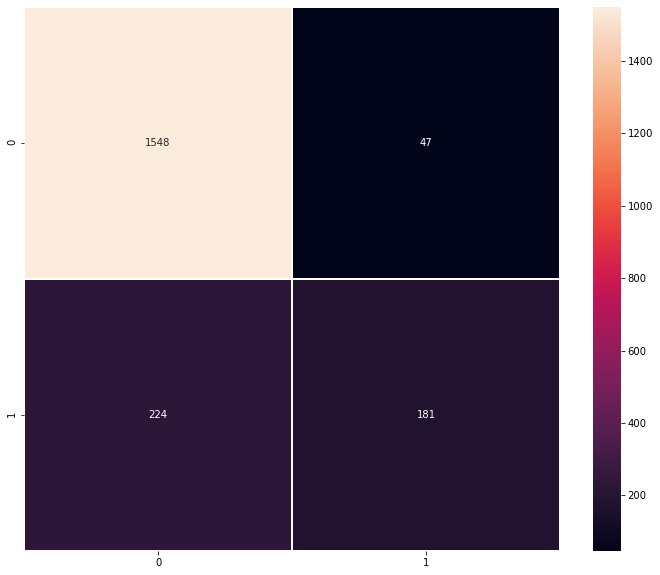

In [53]:
cm = confusion_matrix(y_test, y_test_pred_RF)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt = "d",linewidths=.5, ax=ax)

### e) - Calcul des scores "Accuracy", "Recall", & "Precision" :

In [54]:
#RandomForest
Accuracy_RF =  "%.4f" % accuracy_score(y_test, y_test_pred_RF)
Recall_RF = "%.2f" % recall_score(y_test, y_test_pred_RF)
Precision_RF = "%.4f" % precision_score(y_test.astype(int), y_test_pred_RF.astype(int))

print("Accuracy_RF :", Accuracy_RF)
print("Recall_RF :", Recall_RF)
print("Precision_RF :", Precision_RF)

Accuracy_RF : 0.8645
Recall_RF : 0.45
Precision_RF : 0.7939


## Comparaison entre les trois modèles de classification utilisés : 

In [55]:
models = ['Logistic Regression', 'Decision tree', 'Random Forest']
accuracy = [float(Accuracy_LR)*100, float(Accuracy_DT)*100, float(Accuracy_RF)*100]
recall = [float(Recall_LR)*100, float(Recall_DT)*100, float(Recall_RF)*100]
precision = [float(Precision_LR)*100, float(Precision_DT)*100, float(Precision_RF)*100]

d = {'Accuracy': accuracy, 'Recall': recall, 'Precision ': precision}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,Accuracy,Recall,Precision
Logistic Regression,81.15,20.101781,55.633803
Decision tree,79.50,50.120000,49.390000
Random Forest,86.45,45.000000,79.390000


-  **Après avoir construit plusieurs modèles, nous nous sommes retrouvés avec le Random Forest qui a mieux performé. Il a atteint environ 87% d'accuary.**

## Appliquer la prédiction sur des exemples : 

In [77]:
#Testons maintenant notre modèle RandomForest : 
#[ 'CreditScore','Age', 'Balance','Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male' ]

List_test = [[860, 59, 20000, 10, 2, 1, 1, 6000, 0, 0, 1], [150, 25, 6000, 0, 1, 1, 0, 2500, 0, 1, 0] ]
#Exemple 1 : Profil d'un Homme agé de 59 ans qui  a un salaire 6000 euros, et qui habite en France
#Exemple 2 : Profil d'une Femme agé de 25 ans qui a un salaire 2500 euros, et qui habite en Espagne
Jeu_test = pd.DataFrame(List_test, columns = [ 'CreditScore','Age', 'Balance','Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male' ])
Jeu_test.shape

# Prédiction sur le jeu de test
pred = classifier3_RF.predict(List_test)
print("Prediction Profil Homme :", pred[0])
print("Prediction Profil Femme :", pred[1])

Prediction Profil Homme : 0
Prediction Profil Femme : 1


## Conclusion : 

  - Nous avons vu tous les étapes d'un projet DataScience depuis l'exploration des données jusqu'à de construction d'un modèle prédictif, puis l'appliquer sur des cas d'exemples.
  
  - Dans cette étude, nous avons essayé de prédir la probabilité qu'un client quitte de la banque ou non, en utilisant trois modèles de classification.

  - Au cours de l'analyse exploratoire des données, nous avons découvert que les clients féminins, les clients situés en Allemagne, et les clients n'utilisant qu'un seul produit sont les plus susceptibles de désister. 

DONE BY : HAMZA BENNINI